<a href="https://colab.research.google.com/github/Rohanjos97/major_project/blob/CNN_for_ear_recognition/biocube/Evaluation_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import roc_curve, auc

import numpy
matplotlib.use('TkAgg')
import pylab

/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_91621/3739439451.py:12: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('TkAgg')


In [14]:
dataset_path = os.path.join(os.getcwd(), 'PRP_with_ICT')

In [15]:
def compare_images_pixelwise(image1, image2):
    image1, image2 = cv2.imread(image1), cv2.imread(image2)
#     plt.imshow(image1)
#     plt.show()
#     plt.imshow(image2)
#     plt.show()

    # Check if the images have the same dimensions
    if image1.shape == image2.shape:
        # Compute pixel-wise difference
        difference = cv2.absdiff(image1, image2)

        # Calculate the percentage of similarity (lower percentage means higher similarity)
        similarity_percentage = (np.sum(difference) / (image1.size))

        # plt.imshow(difference)
        # plt.show()

        return similarity_percentage
    else:
        return "Images have different dimensions"

def compare_images_correlation(image1, image2):
    image1, image2 = cv2.imread(image1), cv2.imread(image2)
#     plt.imshow(image1)
#     plt.show()
#     plt.imshow(image2)
#     plt.show()

    # Check if the images have the same dimensions
    if image1.shape == image2.shape:

        correlation = np.corrcoef(image1.flatten(), image2.flatten())[0, 1]
        return correlation
    else:
        return "Images have different dimensions"

def compare_images_ssim(image1, image2):
    image1, image2 = cv2.imread(image1), cv2.imread(image2)

#     # Convert images to grayscale if necessary
#     if img1.shape[-1] == 3:
#         img1 = color.rgb2gray(img1)
#         img2 = color.rgb2gray(img2)

    # Calculate Structural Similarity Index (SSI)
    similarity_index, _ = ssim(image1, image2, channel_axis=-1, full=True)
    return similarity_index

def compare_images_mse(image1, image2):
    image1, image2 = cv2.imread(image1), cv2.imread(image2)
#     plt.imshow(image1)
#     plt.show()
#     plt.imshow(image2)
#     plt.show()

    diff = cv2.subtract(image1, image2)
    err = np.sum(diff**2)
    mse = err/(float(image1.size))
    return mse

In [16]:
def calculate_scores(dataset_path, score_type='pixelwise'):
    genuine_scores = []
    impostor_scores = []

    folders = os.listdir(dataset_path)
    for folder1 in folders:
        folder1_path = os.path.join(dataset_path, folder1)
        # print(folder1_path)
        for folder2 in folders:
            folder2_path = os.path.join(dataset_path, folder2)
            # print(folder2_path)
            for file1 in os.listdir(folder1_path):
                if file1.endswith('.png'):
                    img1_path = os.path.join(folder1_path, file1)
                    for file2 in os.listdir(folder2_path):
                        if file2.endswith('.png'):
                            img2_path = os.path.join(folder2_path, file2)

                            # Calculate similarity score
                            if score_type == 'pixelwise':
                                similarity_score = compare_images_pixelwise(img1_path, img2_path)
                            elif score_type == 'correlation':
                                similarity_score = compare_images_correlation(img1_path, img2_path)
                            elif score_type =='mse':
                                similarity_score = compare_images_mse(img1_path, img2_path)
                            elif score_type == 'ssim':
                                similarity_score = compare_images_ssim(img1_path, img2_path)
#                             print(similarity_score)
#                 break
#             break
#         break
                            if folder1 == folder2:
                                genuine_scores.append(similarity_score)
                            else:
                                impostor_scores.append(similarity_score)

    return genuine_scores, impostor_scores

def calculate_unlinkability_mated_score(dataset_path, keys, score_type='correlation', total_users= 220):
    mated_scores = []

    for key_folder in range(1, keys+1):
        key1 = f'k{key_folder}'
        key1_path = os.path.join(dataset_path, key1)
        # print(key1_path) # PRP_with_ICT/k1

        for users in range(1, total_users+1):
            user = f'user_{users}'
            # print(user) # user_1
            user_path = os.path.join(key1_path, user)

            # print(user_path) # PRP_with_ICT/k1/user_
            
            # for file1 in os.listdir(users_path):
            #     print(file1)
            img1_path = os.path.join(user_path, '1.png')
            # print(img1_path) # PRP_with_ICT/k1/user_1/1.png
            # GOT THE FIRST IMAGE FOR COMPARISON

            # FIND THE SECOND IMAGE TO COMPARE
            other_keys = list(range(key_folder+1, keys+1))
            for key2_folder in other_keys:
                other_key = f'k{key2_folder}'
                img2_path = os.path.join(dataset_path, other_key, user, '1.png')
                # print(img2_path)

                # Calculate similarity score
                if score_type == 'pixelwise':
                    mated_score = compare_images_pixelwise(img1_path, img2_path)
                elif score_type == 'correlation':
                    mated_score = compare_images_correlation(img1_path, img2_path)
                elif score_type =='mse':
                    mated_score = compare_images_mse(img1_path, img2_path)
                elif score_type == 'ssim':
                    mated_score = compare_images_ssim(img1_path, img2_path)
                # print(mated_score)
                mated_scores.append(mated_score)
    return mated_scores

def calculate_unlinkability_non_mated_score(dataset_path, keys, score_type='correlation', total_users= 220):
    non_mated_scores = []

    for key_folder in range(1, keys+1):
        key1 = f'k{key_folder}'
        key1_path = os.path.join(dataset_path, key1)
        # print(key1_path) # PRP_with_ICT/k1

        for users in range(1, total_users+1):
            user = f'user_{users}'
            # print(user) # user_1
            user_path = os.path.join(key1_path, user)

            # print(user_path) # PRP_with_ICT/k1/user_
            
            # for file1 in os.listdir(users_path):
            #     print(file1)
            img1_path = os.path.join(user_path, '1.png')
            # print(img1_path) # PRP_with_ICT/k1/user_1/1.png
            # GOT THE FIRST IMAGE FOR COMPARISON

            # FIND THE SECOND IMAGE TO COMPARE
            other_users = list(range(users+1, total_users+1))
            for other_user in other_users:
                user2 = f'user_{other_user}'
                if user == other_user:
                    continue
                other_keys = list(range(key_folder+1, keys+1))
                for key2_folder in other_keys:
                    other_key = f'k{key2_folder}'
                    img2_path = os.path.join(dataset_path, other_key, user2, '1.png')
                    # print(img2_path)

                # Calculate similarity score
                if score_type == 'pixelwise':
                    non_mated_score = compare_images_pixelwise(img1_path, img2_path)
                elif score_type == 'correlation':
                    non_mated_score = compare_images_correlation(img1_path, img2_path)
                elif score_type =='mse':
                    non_mated_score = compare_images_mse(img1_path, img2_path)
                elif score_type == 'ssim':
                    non_mated_score = compare_images_ssim(img1_path, img2_path)
                # print(non_mated_score)
                non_mated_scores.append(non_mated_score)
    return non_mated_scores

In [10]:
# Calculated mated and non-mated score for unlinkability analysis

mated_score = calculate_unlinkability_mated_score(dataset_path, keys=6)
non_mated_score = calculate_unlinkability_non_mated_score(dataset_path, keys=6)
mated_score_ssim = calculate_unlinkability_mated_score(dataset_path, keys=6, score_type='ssim')
non_mated_score_ssim = calculate_unlinkability_non_mated_score(dataset_path, keys=6, score_type='ssim')

# Save the results in a textfile
with open('mated_corr.txt', 'w') as file:
    for item in mated_score:
        file.write(str(item) + '\n')

with open('non_mated_corr.txt', 'w') as file:
    for item in non_mated_score:
        file.write(str(item) + '\n')

with open('mated_ssim.txt', 'w') as file:
    for item in mated_score_ssim:
        file.write(str(item) + '\n')

with open('non_corr_ssim.txt', 'w') as file:
    for item in non_mated_score_ssim:
        file.write(str(item) + '\n')

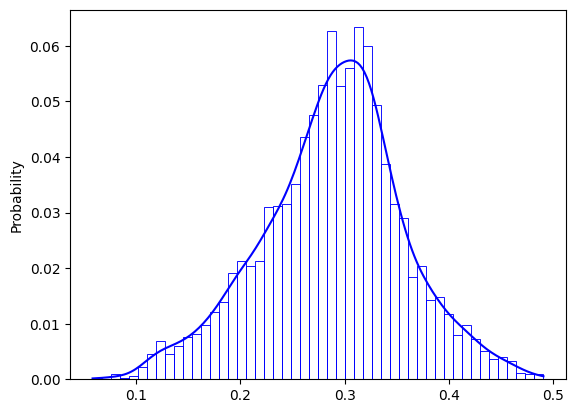

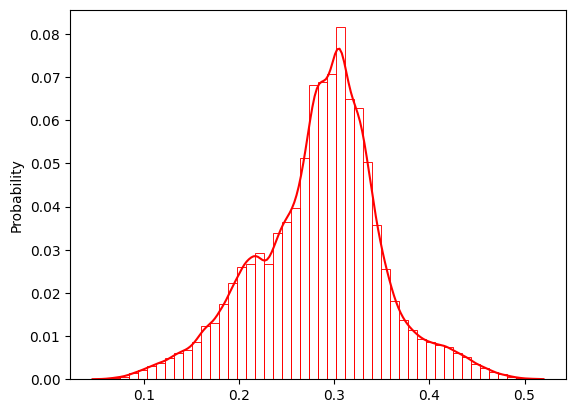

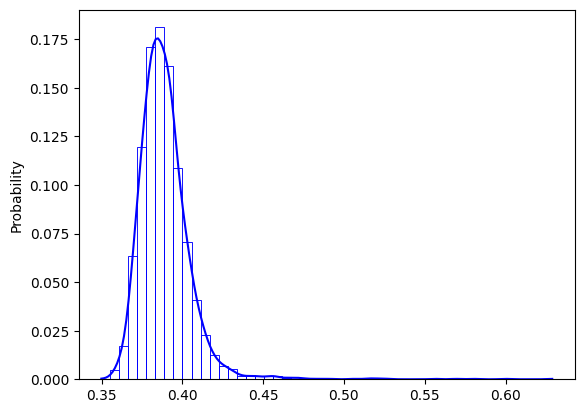

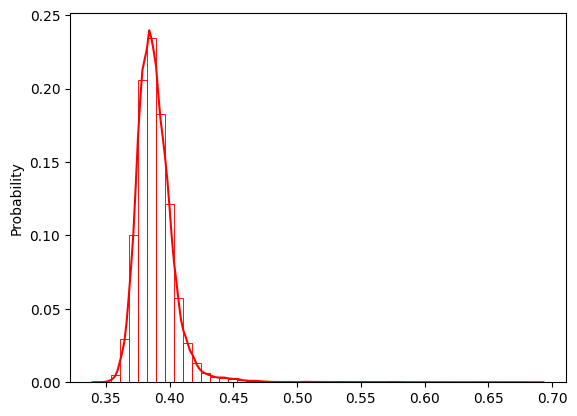

In [12]:
sns.histplot(mated_score, color='blue', label='Genuine Scores', bins=50, kde=True, stat='probability', fill=False)
plt.show()
sns.histplot(non_mated_score, color='red', label='Impostor Scores', bins=50, kde=True, stat='probability', fill=False)
plt.show()
sns.histplot(mated_score_ssim, color='blue', label='Genuine Scores', bins=50, kde=True, stat='probability', fill=False)
plt.show()
sns.histplot(non_mated_score_ssim, color='red', label='Impostor Scores', bins=50, kde=True, stat='probability', fill=False)
plt.show()

In [25]:
################################################################# CREDIT ###############################################################
# Github Implementation: https://github.com/dasec/unlinkability-metric
# Cited from: M. Gomez-Barrero, J. Galbally, C. Rathgeb and C. Busch,
# "General Framework to Evaluate Unlinkability in Biometric Template Protection Systems,"
# in IEEE Transactions on Information Forensics and Security, vol. 13, no. 6, pp. 1406-1420, June 2018,
# doi: 10.1109/TIFS.2017.2788000.
# keywords: {Measurement;Privacy;Benchmark testing;Bioinformatics;Cryptography;Magnetic resonance;IEC Standards;Unlinkability;privacy;template protection;biometrics;performance testing},
#########################################################################################################################################


def unlinkability_analysis(matedScores, nonMatedScores, figureFile='file', omega=1, figureTitle='Unlinkability Analysis', nBins=30, legendLocation='upper right'):
    if nBins == -1:
    	nBins = min(len(matedScores)/10,100)
    
    # define range of scores to compute D
    bin_edges = numpy.linspace(min([min(matedScores), min(nonMatedScores)]), max([max(matedScores), max(nonMatedScores)]), num=nBins + 1, endpoint=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2 # find bin centers
    
    # compute score distributions (normalised histogram)
    y1 = numpy.histogram(matedScores, bins = bin_edges, density = True)[0]
    y2 = numpy.histogram(nonMatedScores, bins = bin_edges, density = True)[0]
    
    # Compute LR and D
    LR = numpy.divide(y1, y2, out=numpy.ones_like(y1), where=y2!=0)
    D = 2*(omega*LR/(1 + omega*LR)) - 1
    D[omega*LR <= 1] = 0
    D[y2 == 0] = 1 # this is the definition of D, and at the same time takes care of inf / nan
    
    # Compute and print Dsys
    Dsys = numpy.trapz(x = bin_centers, y = D* y1)
    print(Dsys)
    
    
    ### Plot final figure of D + score distributions
    
    plt.clf()
    
    sns.set_context("paper",font_scale=1.7, rc={"lines.linewidth": 2.5})
    sns.set_style("white")
    
    ax = sns.kdeplot(matedScores, shade=False, label='Mated', color=sns.xkcd_rgb["medium green"])
    x1,y1 = ax.get_lines()[0].get_data()
    ax = sns.kdeplot(nonMatedScores, shade=False, label='Non-Mated', color=sns.xkcd_rgb["pale red"],linewidth=5, linestyle='--')
    x2,y2 = ax.get_lines()[1].get_data()
    
    ax2 = ax.twinx()
    lns3, = ax2.plot(bin_centers, D, label='$\mathrm{D}_{\leftrightarrow}(s)$', color=sns.xkcd_rgb["denim blue"],linewidth=5)
    
    # print omega * LR = 1 lines
    index = numpy.where(D <= 0)
    ax.axvline(bin_centers[index[0][0]], color='k', linestyle='--')
    
    #index = numpy.where(LR > 1)
    #ax.axvline(bin_centers[index[0][2]], color='k', linestyle='--')
    #ax.axvline(bin_centers[index[0][-1]], color='k', linestyle='--')
    
    
    # Figure formatting
    ax.spines['top'].set_visible(False)
    ax.set_ylabel("Probability Density")
    ax.set_xlabel("Score")
    ax.set_title("%s, $\mathrm{D}_{\leftrightarrow}^{\mathit{sys}}$ = %.2f" % (figureTitle, Dsys),  y = 1.02)
    
    labs = [ax.get_lines()[0].get_label(), ax.get_lines()[1].get_label(), ax2.get_lines()[0].get_label()]
    lns = [ax.get_lines()[0], ax.get_lines()[1], lns3]
    ax.legend(lns, labs, loc = legendLocation)
    
    ax.set_ylim([0, max(max(y1), max(y2)) * 1.05])
    ax.set_xlim([bin_edges[0]*0.98, bin_edges[-1]*1.02])
    ax2.set_ylim([0, 1.1])
    ax2.set_ylabel("$\mathrm{D}_{\leftrightarrow}(s)$")
    
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)
    plt.gcf().subplots_adjust(right=0.88)
    pylab.savefig(figureFile)

unlinkability_analysis(np.array(mated_score), np.array(non_mated_score), 'corr_omega1', 1)
unlinkability_analysis(np.array(mated_score), np.array(non_mated_score), 'corr_omega0001', 0.0001)

unlinkability_analysis(np.array(mated_score_ssim), np.array(non_mated_score), 'ssim_omega1', 1)
unlinkability_analysis(np.array(mated_score_ssim), np.array(non_mated_score), 'ssim_omega0001', 0.0001)

<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:47: SyntaxWarning: invalid escape sequence '\m'
  lns3, = ax2.plot(bin_centers, D, label='$\mathrm{D}_{\leftrightarrow}(s)$', color=sns.xkcd_rgb["denim blue"],linewidth=5)
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:62: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title("%s, $\mathrm{D}_{\leftrightarrow}^{\mathit{sys}}$ = %.2f" % (figureTitle, Dsys),  y = 1.02)
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:71: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel("$\mathrm{D}_{\leftrightarrow}(s)$")
/var/folders/66/tyvn43rs4_q

0.037524954138452665
0.0


/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(matedScores, shade=False, label='Mated', color=sns.xkcd_rgb["medium green"])
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(nonMatedScores, shade=False, label='Non-Mated', color=sns.xkcd_rgb["pale red"],linewidth=5, linestyle='--')


0.838502670979875


/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(matedScores, shade=False, label='Mated', color=sns.xkcd_rgb["medium green"])
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(nonMatedScores, shade=False, label='Non-Mated', color=sns.xkcd_rgb["pale red"],linewidth=5, linestyle='--')


0.0013636363636363653


/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(matedScores, shade=False, label='Mated', color=sns.xkcd_rgb["medium green"])
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_55328/3428340334.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(nonMatedScores, shade=False, label='Non-Mated', color=sns.xkcd_rgb["pale red"],linewidth=5, linestyle='--')


In [11]:
def plot_roc_curve(genuine_scores, impostor_scores, score_type):

    # Create labels for ROC curve
    labels = [1] * len(genuine_scores) + [0] * len(impostor_scores)
    scores = genuine_scores + impostor_scores

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(labels, scores)

    plt.figure()
    plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc(fpr, tpr)))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {str.capitalize(score_type)} Metric')
    plt.legend(loc='lower right')
    plt.show()

def plot_histograms(genuine_scores, impostor_scores, score_type):
    plt.figure(figsize=(10, 6))

    sns.histplot(genuine_scores, color='blue', label='Genuine Scores', bins=50, kde=True, stat='probability', fill=False)
    sns.histplot(impostor_scores, color='red', label='Impostor Scores', bins=50, kde=True, stat='probability', fill=False)
#     plt.yscale('log')
    plt.title(f'Histogram of Similarity Scores for {str.capitalize(score_type)} Metric')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    plt.show()

# To plot two scores in same plot
def plot_histograms_comb(genuine_scores_c, impostor_scores_c, score_type1, genuine_scores_ss, impostor_scores_ss, score_type2, template):
    plt.figure(figsize=(10, 6))
    plt.xlim([0.0, 1.1])
    sns.histplot(genuine_scores_c, color='black', label=f'{score_type1}: Genuine Scores', bins=50, kde=True, stat='probability', fill=False, alpha=1, linewidth=2)
    sns.histplot(impostor_scores_c, color='green', label=f'{score_type1}: Impostor Scores', bins=50, kde=True, stat='probability', fill=False, alpha=1, linewidth=2)
    sns.histplot(genuine_scores_ss, color='yellow', label=f'{score_type2}: Genuine Scores', bins=50, kde=True, stat='probability', fill=False, alpha=0.5, linewidth=2)
    sns.histplot(impostor_scores_ss, color='violet', label=f'{score_type2}: Impostor Scores', bins=50, kde=True, stat='probability', fill=False, alpha=1, linewidth=2)

    plt.title(f'Histogram Plot for {template} Template')
    plt.xlabel('Similarity Score', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.legend(loc='upper left', fontsize=12)

    plt.show()

def calculate_far_frr(genuine_scores, impostor_scores, threshold):
    far = sum(score > threshold for score in impostor_scores) / len(impostor_scores)
    frr = sum(score <= threshold for score in genuine_scores) / len(genuine_scores)
    return far, frr

In [17]:
dataset_path = os.path.join(os.getcwd(), 'PRP_with_ICT', 'k1')
gs_corr, ims_corr = calculate_scores(dataset_path, score_type='correlation')
gs_ssim, ims_ssim = calculate_scores(dataset_path, score_type='ssim')

# Save the results in a textfile
with open('genuine_scores_c.txt', 'w') as file:
    for item in gs_corr:
        file.write(str(item) + '\n')

with open('impostor_scores_c.txt', 'w') as file:
    for item in ims_corr:
        file.write(str(item) + '\n')

with open('genuine_scores_ss.txt', 'w') as file:
    for item in gs_ssim:
        file.write(str(item) + '\n')

with open('impostor_scores_ss.txt', 'w') as file:
    for item in ims_ssim:
        file.write(str(item) + '\n')

In [ ]:
plot_histograms_comb(gs_corr, ims_corr, "Correlation", gs_ssim, ims_ssim, "SSIM", "PRP")

In [24]:
plot_roc_curve(gs_corr, ims_corr, 'correlation')
plot_histograms(gs_corr, ims_corr, 'ssim')


/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_91621/1319229166.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/66/tyvn43rs4_q5ty7s6l_dlzy40000gn/T/ipykernel_91621/1319229166.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
plot_roc_curve(genuine_scores_p_tmp, impostor_scores_p_tmp, score_type)
plot_histograms(gs_ssim, ims_ssim, score_type)


## Metric = Pixelwise Comparision (NOT GOOD as it is a measure of dissimilarity)

### calculated 1/(1+score) to get higher value of score for similar images and lower value of score that are dissimilar

In [ ]:
score_type = 'pixelwise'

In [ ]:
genuine_scores_p, impostor_scores_p = calculate_scores(dataset_path)

In [ ]:
#TO assign higher weights to lower values and vice versa
genuine_scores_p_tmp = [1 / (1 + element) for element in genuine_scores_p]
impostor_scores_p_tmp = [1 / (1 + element) for element in impostor_scores_p]

In [ ]:
plot_roc_curve(genuine_scores_p_tmp, impostor_scores_p_tmp, score_type)
plot_histograms(genuine_scores_p_tmp, impostor_scores_p_tmp, score_type)

# Choose a threshold (you may want to optimize this based on your specific requirements)
threshold_p = 50

# Calculate FAR and FRR
far, frr = calculate_far_frr(genuine_scores_p_tmp, impostor_scores_p_tmp, threshold_p)
print(f"FAR: {far}, FRR: {frr}")

## Metric = Correlation Comparision (GOOD)

In [ ]:
score_type = 'correlation'

In [ ]:
genuine_scores_c, impostor_scores_c = calculate_scores(dataset_path, score_type)

In [ ]:
# impostor_scores_c

In [ ]:
plot_roc_curve(genuine_scores_c, impostor_scores_c, score_type)
plot_histograms(genuine_scores_c, impostor_scores_c, score_type)

# Choose a threshold (you may want to optimize this based on your specific requirements)
threshold_c = 0.5

# Calculate FAR and FRR
far, frr = calculate_far_frr(genuine_scores_c, impostor_scores_c, threshold_c)
print(f"FAR: {far}, FRR: {frr}")

## Metric = MSE Comparision (NOT GOOD as it is a measure of dissimilarity)

In [ ]:
score_type = 'mse'

In [ ]:
genuine_scores_m, impostor_scores_m = calculate_scores(dataset_path, score_type)

In [ ]:
plot_roc_curve(genuine_scores_m, impostor_scores_m, score_type)
plot_histograms(genuine_scores_m, impostor_scores_m, score_type)

# Choose a threshold (you may want to optimize this based on your specific requirements)
threshold_m = 2

# Calculate FAR and FRR
far, frr = calculate_far_frr(genuine_scores_m, impostor_scores_m, threshold_m)
print(f"FAR: {far}, FRR: {frr}")

## Metric = SSIM Comparision

In [ ]:
score_type = 'ssim'

In [ ]:
genuine_scores_ss, impostor_scores_ss = calculate_scores(dataset_path, score_type)

In [ ]:
# impostor_scores_ss

In [ ]:
plot_roc_curve(genuine_scores_ss, impostor_scores_ss, score_type)
plot_histograms(genuine_scores_ss, impostor_scores_ss, score_type)

# Choose a threshold (you may want to optimize this based on your specific requirements)
threshold_ss = 0.7

# Calculate FAR and FRR
far, frr = calculate_far_frr(genuine_scores_ss, impostor_scores_ss, threshold_ss)
print(f"FAR: {far}, FRR: {frr}")

## If we have already calculated the score and saved them in a file in the following format, can use those to save calculation time

In [ ]:
# Use previously calculated score, (saves time by not calculation score again and again)

# The data for JAB code templates
genuine_scores_c, impostor_scores_c, genuine_scores_ss, impostor_scores_ss = [], [], [], []

# Open the file in read mode
with open('genuine_scores_c.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        genuine_scores_c.append(float(line.strip()))

with open('impostor_scores_c.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        impostor_scores_c.append(float(line.strip()))

with open('genuine_scores_ss.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        genuine_scores_ss.append(float(line.strip()))

with open('impostor_scores_ss.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        impostor_scores_ss.append(float(line.strip()))

# The data for PGP generated templates
genuine_scores_c_mg, impostor_scores_c_mg, genuine_scores_ss_mg, impostor_scores_ss_mg = [], [], [], []

# Open the file in read mode
with open('genuine_scores_c_MG.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        genuine_scores_c_mg.append(float(line.strip()))

with open('impostor_scores_c_MG.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        impostor_scores_c_mg.append(float(line.strip()))

with open('genuine_scores_ss_MG.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        genuine_scores_ss_mg.append(float(line.strip()))

with open('impostor_scores_ss_MG.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to an integer and append it to the list
        impostor_scores_ss_mg.append(float(line.strip()))
plot_histograms_comb(genuine_scores_c, impostor_scores_c, "Correlation", genuine_scores_ss_mg, impostor_scores_ss_mg, "SSIM", "JAB Code")